Project: Predicting heart disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Data Analysis:
# a. Import the dataset
# b. Get information about the dataset (mean, max, min, quartiles etc.)
# c. Find the correlation between all fields
df = pd.read_csv("/content/dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


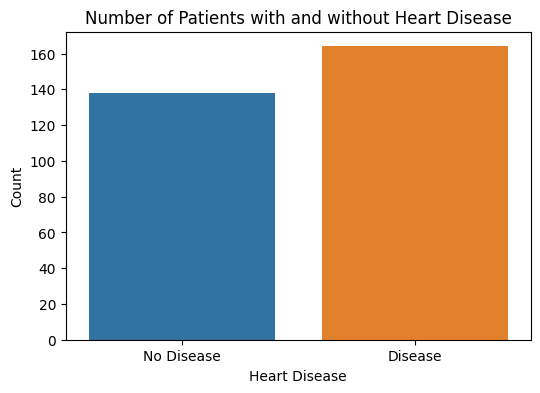

In [13]:
# 2. Data Visualization:
# a. Visualize the number of patients having a heart disease and not having
# a heart disease
# b. Visualize the age and whether a patient has disease or not
# c. Visualize correlation between all features using a heat map

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Number of Patients with and without Heart Disease')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

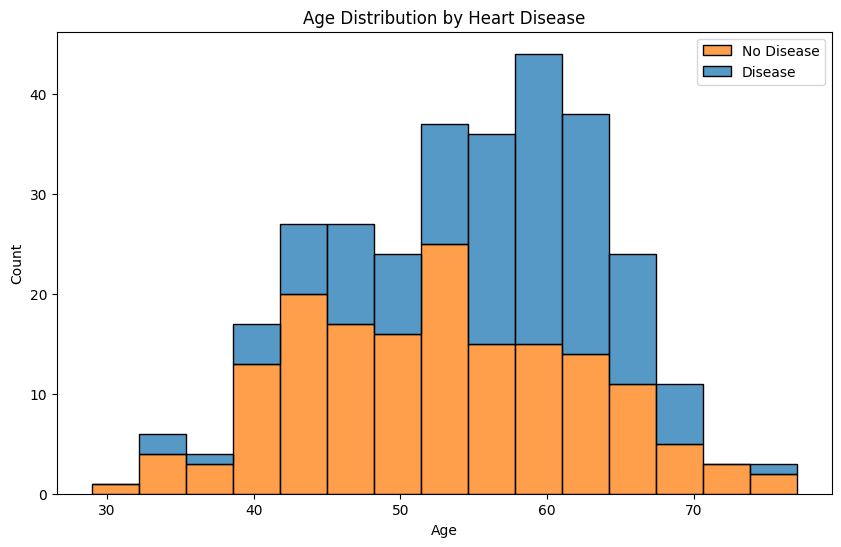

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', bins=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Heart Disease')
plt.legend(['No Disease', 'Disease'])
plt.show()


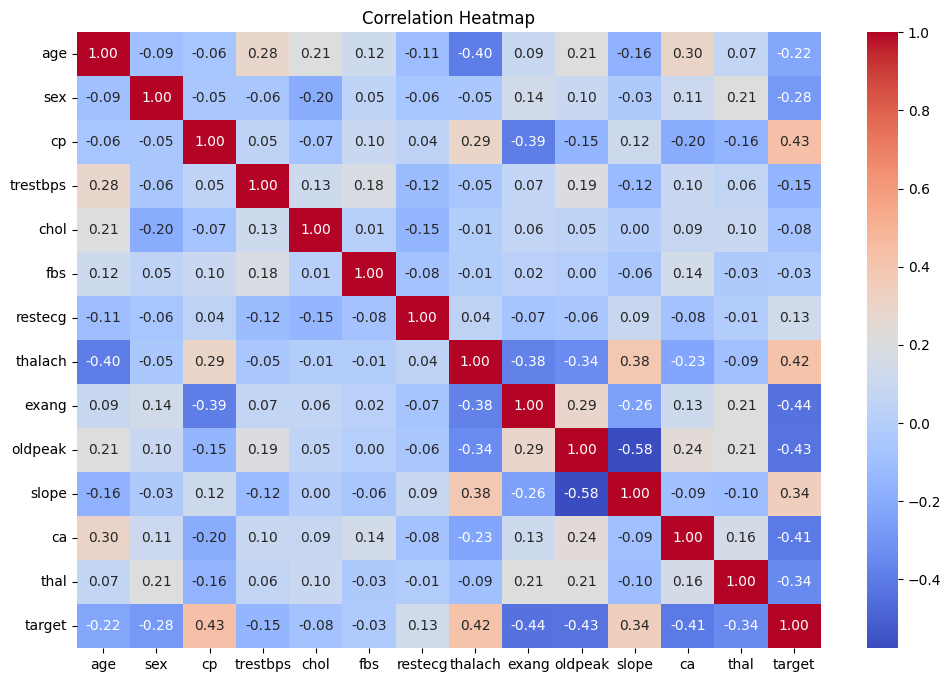

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Logistic Regression:
# a. Build a simple logistic regression model:
# i. Divide the dataset in 70:30 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and get the accuracy score
from sklearn.model_selection import train_test_split
X = df.drop(columns=['target'])
y = df['target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.8131868131868132

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[34  8]
 [ 9 40]]


In [25]:
# Decision Tree:
# a. Build a decision tree model:
# i. Divide the dataset in 70:30 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and calculate the accuracy
# iv. Visualize the decision tree using the Graphviz package
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)


In [26]:
accuracy_score(y_test,y_pred)

0.7912087912087912

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[34  8]
 [11 38]]


In [30]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtc, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)

graph.render("heart_disease_decision_tree", format='png')  # Output a PNG file

'heart_disease_decision_tree.png'

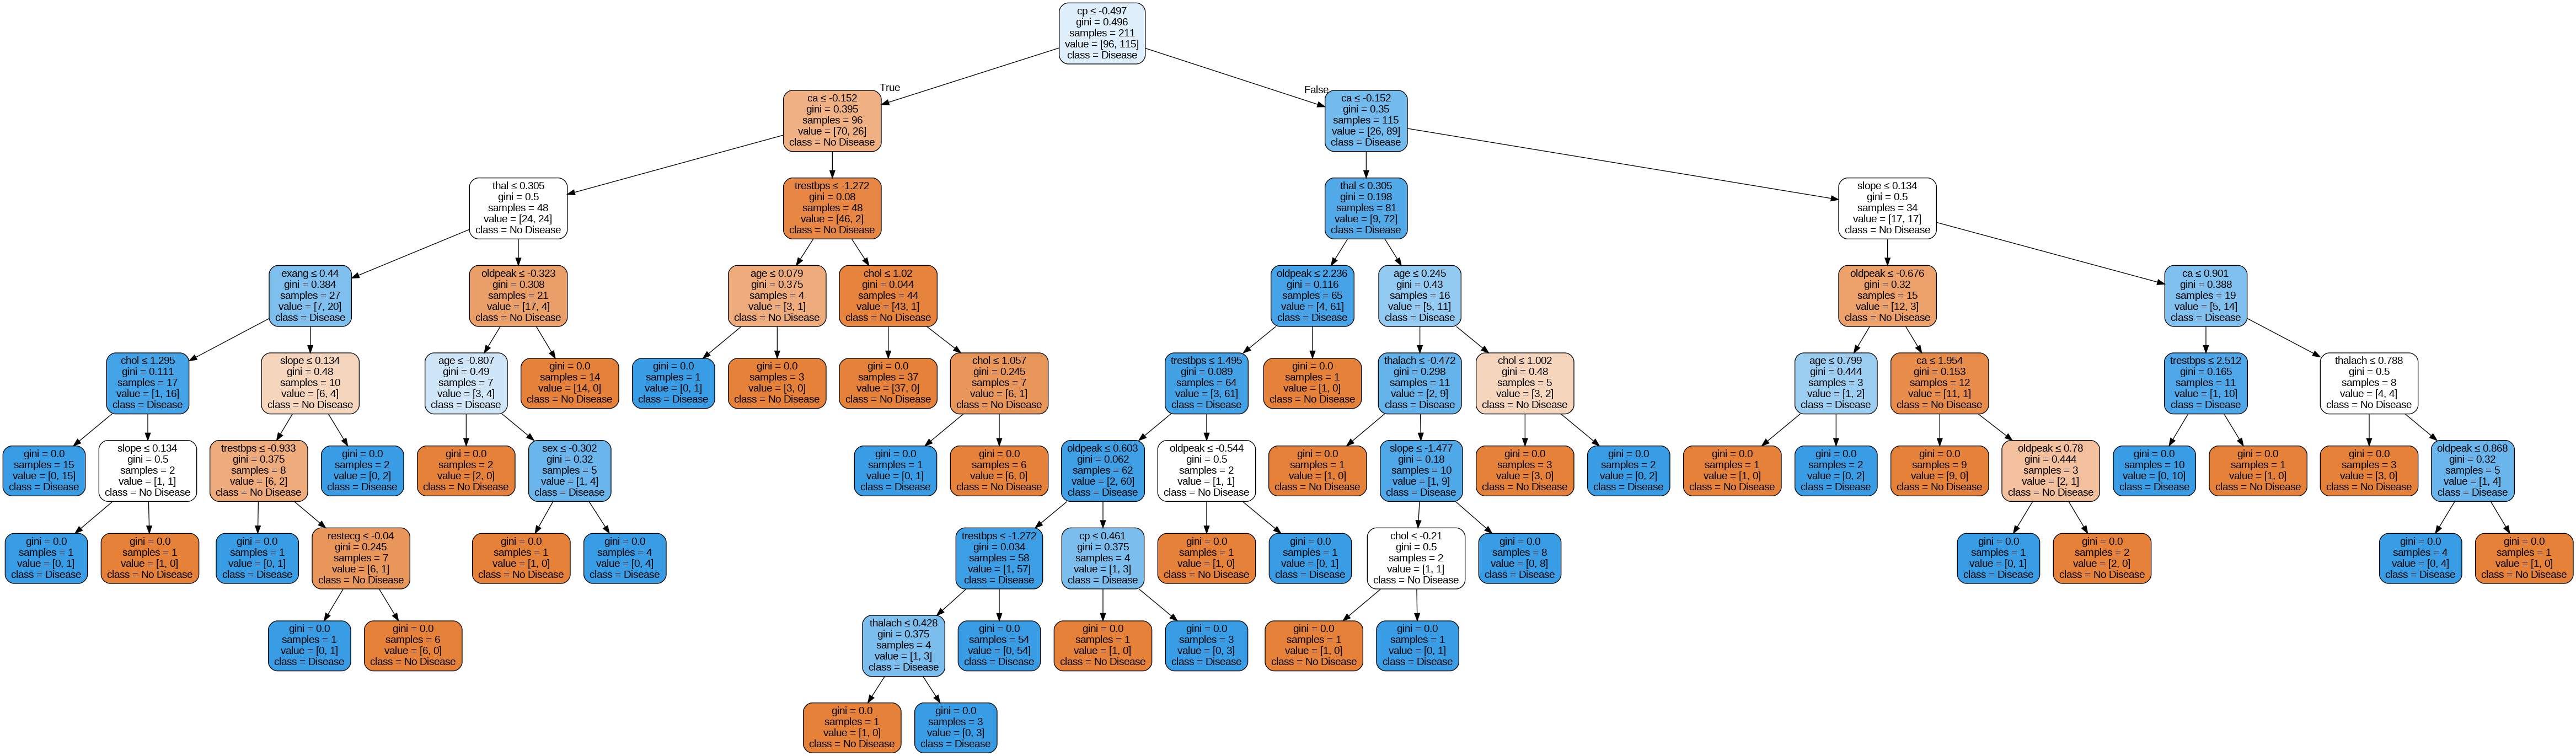

In [31]:
from IPython.display import Image, display

# Specify the filename of the uploaded PNG file
filename = "heart_disease_decision_tree.png"  # Change this to your filename

# Display the image
display(Image(filename))

In [32]:
# Random Forest:
# a. Build a Random Forest model:
# i. Divide the dataset in 70:30 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and calculate the accuracy
# iv. Visualize the model using the Graphviz package

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.8351648351648352

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[35  7]
 [ 8 41]]


In [35]:
estimator = rfc.estimators_[0]

dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("random_forest_decision_tree", format='png')

'random_forest_decision_tree.png'

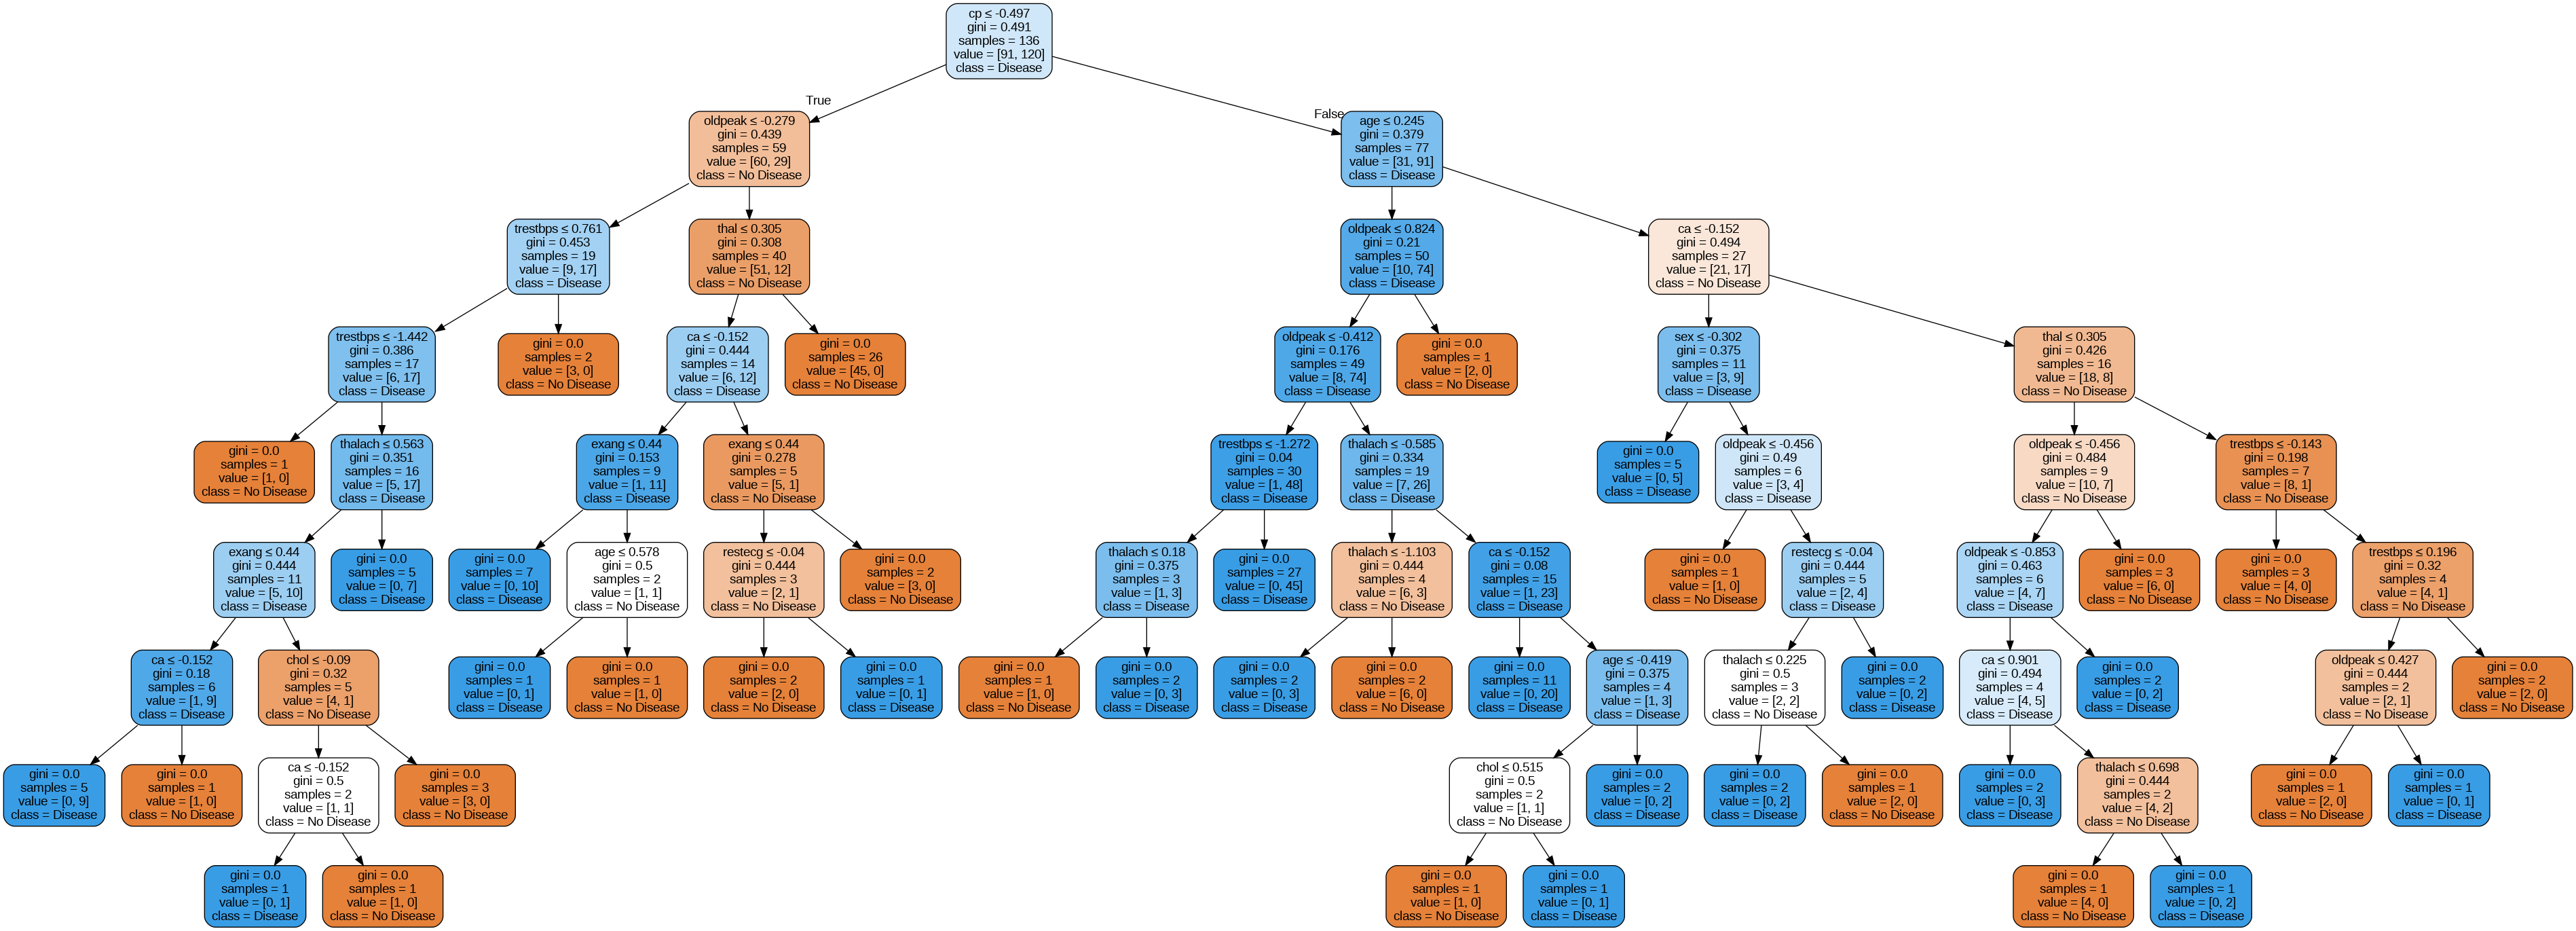

In [36]:
from IPython.display import Image, display

# Specify the filename of the uploaded PNG file
filename = "random_forest_decision_tree.png"  # Change this to your filename

# Display the image
display(Image(filename))

In [46]:
# Select the best model
# a. Print the confusion matrix of all classifiers
# b. Print the classification report of all classifiers
# c. Calculate Recall Precision and F1 score of all the models
# d. Visualize confusion matrix using heatmaps
# e. Select the best model based on the best accuracies

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

metrics = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {name}:")
    print(conf_matrix)

    # Classification Report
    class_report = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'])
    print(f"\nClassification Report for {name}:\n{class_report}")

    # Calculate Recall, Precision, and F1 Score
    recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
    precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    metrics[name] = {'Recall': recall, 'Precision': precision, 'F1 Score': f1_score, 'Accuracy': accuracy}



Confusion Matrix for Logistic Regression:
[[34  8]
 [ 9 40]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

  No Disease       0.79      0.81      0.80        42
     Disease       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


Confusion Matrix for Decision Tree:
[[37  5]
 [11 38]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

  No Disease       0.77      0.88      0.82        42
     Disease       0.88      0.78      0.83        49

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91


Confusion Matrix for Random Forest:
[[36  6]
 [ 8 41]]

Classification Report for Random Forest:
              precision    recall  f1-sc


Metrics:
           Logistic Regression  Decision Tree  Random Forest
Recall                0.816327       0.775510       0.836735
Precision             0.833333       0.883721       0.872340
F1 Score              0.824742       0.826087       0.854167
Accuracy              0.813187       0.824176       0.846154


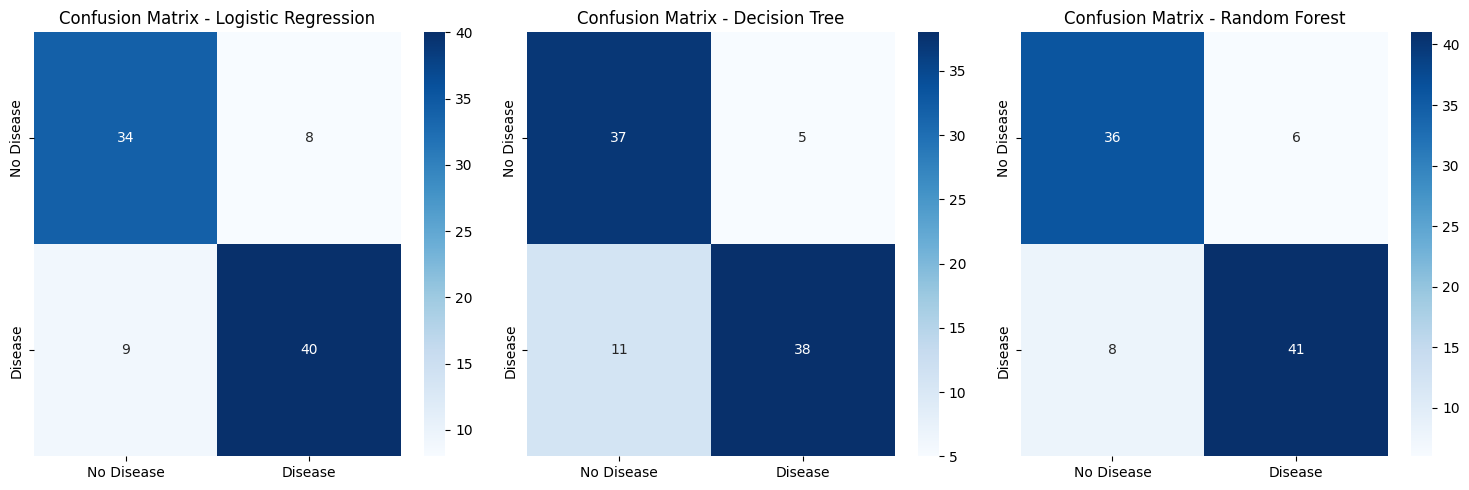


Best Model based on Accuracy: Random Forest


In [47]:
metrics_df = pd.DataFrame(metrics)

# Print metrics DataFrame
print("\nMetrics:")
print(metrics_df)

# Visualize confusion matrices using heatmaps
plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(classifiers.items(), 1):
    plt.subplot(1, len(classifiers), i)
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)),
                annot=True, cmap='Blues', fmt='d',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix - {name}')
plt.tight_layout()
plt.show()

# Select the best model based on highest accuracy
best_model_name = max(metrics, key=lambda x: metrics[x]['Accuracy'])
print(f"\nBest Model based on Accuracy: {best_model_name}")